# Technology and Crime in Arrests in the City of Chicago

## Installing libraries, dependencies, and data

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [3]:
# Upload the Arrests in Chicago_2014_to_2023.csv file
from google.colab import files
uploaded = files.upload()

Saving chicago_arrests.csv to chicago_arrests.csv


In [4]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("chicago_arrests.csv")

# Preview the dataset
df.head()

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 3 TYPE,CHARGE 3 CLASS,CHARGE 4 STATUTE,CHARGE 4 DESCRIPTION,CHARGE 4 TYPE,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS
0,18922700,NaN,06/26/2014 10:51:00 PM,BLACK,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,NaN,Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,725 ILCS 5.0/110-3 | | |,ISSUANCE OF WARRANT | | |,| | |,Z | | |
1,18922086,NaN,06/26/2014 12:07:00 AM,BLACK,625 ILCS 5.0/6-303-A,DRIVING ON SUSPENDED LICENSE,M,A,9-76-160(A),DISPLAY ST REG-FRONT/REAR,...,NaN,NaN,NaN,NaN,NaN,NaN,625 ILCS 5.0/6-303-A | 9-76-160(A) | |,DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...,M | | |,A | L | |
2,18908465,HX290868,06/05/2014 11:58:00 AM,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,720 ILCS 600.0/3.5-A,PCS - DRUG PARAPHERNALIA - POSSESS,...,NaN,NaN,NaN,NaN,NaN,NaN,720 ILCS 570.0/402-C | 720 ILCS 600.0/3.5-A | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | M | |,4 | A | |
3,18914257,HX302763,06/14/2014 04:50:00 AM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,520 ILCS 5.0/1.22,RESIST/OBSTRUCT OFFICER,...,M,A,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3-A-1 | 520 ILCS 5.0/1.22 | 72...,BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...,M | M | M |,A | A | A |
4,18911035,NaN,06/09/2014 08:45:00 AM,BLACK,8-4-030,DRINKING ALCOHOL ON THE PUBLIC WAY,NaN,L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8-4-030 | | |,DRINKING ALCOHOL ON THE PUBLIC WAY | | |,| | |,L | | |


In [5]:
from matplotlib import pyplot as plt

## Section 1: Analysis of Predictive Technology in Larceny including Retail Theft in Chicago

 According to the 2023 National Retail Security Survey, released in late September by the Loss Prevention Research Council and the National Retail Federation retail theft losses increased to $112.1 billion in 2022, up 19% from $93.9 billion the year before.
 Walmart CEO Doug McMillon warned CNBC last December that stores would close if theft doesn't slow. Walmart closed four Chicago stores in April, citing annual losses in the "tens of millions of dollars," but did not explicitly mention theft.
 Whole Foods closed its flagship store in downtown San Francisco in April after opening the location in March 2022. "If we feel we can ensure the safety of our team members in the store, we will evaluate a reopening of our Trinity location," a Whole Foods spokesperson said in a statement.

In [6]:
# View dataframe shape, and the first and last five rows of the DataFrame
print(df.shape)
print(df.head())
print(df.tail())

(585418, 24)
      CB_NO CASE NUMBER             ARREST DATE   RACE       CHARGE 1 STATUTE  \
0  18922700         NaN  06/26/2014 10:51:00 PM  BLACK     725 ILCS 5.0/110-3   
1  18922086         NaN  06/26/2014 12:07:00 AM  BLACK   625 ILCS 5.0/6-303-A   
2  18908465    HX290868  06/05/2014 11:58:00 AM  BLACK   720 ILCS 570.0/402-C   
3  18914257    HX302763  06/14/2014 04:50:00 AM  BLACK  720 ILCS 5.0/12-3-A-1   
4  18911035         NaN  06/09/2014 08:45:00 AM  BLACK                8-4-030   

                                CHARGE 1 DESCRIPTION CHARGE 1 TYPE  \
0                                ISSUANCE OF WARRANT           NaN   
1                       DRIVING ON SUSPENDED LICENSE             M   
2  PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D)             F   
3                        BATTERY - CAUSE BODILY HARM             M   
4                 DRINKING ALCOHOL ON THE PUBLIC WAY           NaN   

  CHARGE 1 CLASS      CHARGE 2 STATUTE                CHARGE 2 DESCRIPTION  \
0

In [7]:
# Drop columns that won't be used
columns_to_drop = ["CB_NO", "CASE NUMBER", "CHARGE 1 STATUTE", "CHARGE 1 DESCRIPTION", "CHARGE 1 TYPE", "CHARGE 1 CLASS",
                   "CHARGE 2 STATUTE", "CHARGE 2 TYPE", "CHARGE 2 CLASS","CHARGE 2 DESCRIPTION", "CHARGE 3 STATUTE", "CHARGE 3 TYPE", "CHARGE 3 CLASS","CHARGE 3 DESCRIPTION", "CHARGE 4 STATUTE","CHARGE 4 DESCRIPTION", "CHARGE 4 TYPE", "CHARGE 4 CLASS", "CHARGES STATUTE", "CHARGES TYPE",	"CHARGES CLASS"]
df = df.drop(columns_to_drop, axis=1)

# Preview the dataset
df.head()

,ARREST DATE,RACE,CHARGES DESCRIPTION
0,06/26/2014 10:51:00 PM,BLACK,ISSUANCE OF WARRANT | | |
1,06/26/2014 12:07:00 AM,BLACK,DRIVING ON SUSPENDED LICENSE | DISPLAY ST REG-...
2,06/05/2014 11:58:00 AM,BLACK,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...
3,06/14/2014 04:50:00 AM,BLACK,BATTERY - CAUSE BODILY HARM | RESIST/OBSTRUCT ...
4,06/09/2014 08:45:00 AM,BLACK,DRINKING ALCOHOL ON THE PUBLIC WAY | | |


In [8]:
# Creating a new DataFrame with only required columns
arrests_df = df[['ARREST DATE', 'CHARGES DESCRIPTION']]

# Converting arrest date into datetime format
arrests_df['ARREST DATE'] = arrests_df['ARREST DATE'].str.replace('/', '-')
arrests_df['ARREST DATE'] = pd.to_datetime(arrests_df['ARREST DATE'], errors='coerce')

# Setting arrest date as the index
arrests_df.set_index('ARREST DATE', inplace=True)

# Sorting the dates
arrests_df.sort_index(inplace=True)

# Displaying the DataFrame from head and tail
display(arrests_df.head())
display(arrests_df.tail())


<ipython-input-8-3a17124451da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrests_df['ARREST DATE'] = arrests_df['ARREST DATE'].str.replace('/', '-')
<ipython-input-8-3a17124451da>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  arrests_df['ARREST DATE'] = pd.to_datetime(arrests_df['ARREST DATE'], errors='coerce')
<ipython-input-8-3a17124451da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,CHARGES DESCRIPTION
ARREST DATE,
2014-01-01 00:02:00,"UUW - WEAPON - FELON, POSSESS/USE FIREARM | FI..."
2014-01-01 00:02:00,RECKLESS DISCH FIREARM - ENDANGER | | |
2014-01-01 00:05:00,RECKLESS DISCH FIREARM - ENDANGER | | |
2014-01-01 00:05:00,"UUW - WEAPON - FELON, POSSESS/USE FIREARM | AG..."
2014-01-01 00:07:00,RECKLESS DISCH FIREARM - ENDANGER | | |


,CHARGES DESCRIPTION
ARREST DATE,
2023-01-15 22:58:00,POSSESS REVOKED FIREARM FOID | AGG UUW/VEH/FIR...
2023-01-15 23:24:00,DRIVING RVK/SUSP DUI/SSS 3RD | POSS TITLE/REGI...
2023-01-15 23:25:00,ISSUANCE OF WARRANT | | |
2023-01-15 23:49:00,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...
2023-01-15 23:52:00,ISSUANCE OF WARRANT | | |


In [9]:
# Slicing the dataframe to include description rows with specific charges containing "THEFT/DISP MERCH"
theft_charges_description = arrests_df
theft_charges_description = theft_charges_description.loc[theft_charges_description['CHARGES DESCRIPTION'].str.contains('THEFT/DISP MERCH', case = False)]

# Displaying the data from head and tail
display(theft_charges_description.head())
display(theft_charges_description.tail())


,CHARGES DESCRIPTION
ARREST DATE,
2014-01-01 16:30:00,RETAIL THEFT/DISP MERCH/<$300 | | |
2014-01-01 17:34:00,RETAIL THEFT/DISP MERCH/<$300/PRECONV | OBSTRU...
2014-01-01 17:45:00,RETAIL THEFT/DISP MERCH/<$300 | | |
2014-01-01 19:45:00,RETAIL THEFT/DISP MERCH/<$300 | | |
2014-01-01 20:30:00,RETAIL THEFT/DISP MERCH/<$300/PRECONV | | |


,CHARGES DESCRIPTION
ARREST DATE,
2023-01-15 09:07:00,RETAIL THEFT/DISP MERCH/<$300 | ASSAULT - SIMP...
2023-01-15 12:05:00,RETAIL THEFT/DISP MERCH/<$300 | | |
2023-01-15 17:35:00,RETAIL THEFT/DISP MERCH/<$300 | | |
2023-01-15 19:31:00,RETAIL THEFT/DISP MERCH/<$300 | | |
2023-01-15 21:04:00,RETAIL THEFT/DISP MERCH/<$300 | | |


In [10]:
# Describe the data
theft_charges_description.describe()

,CHARGES DESCRIPTION
count,26041
unique,1117
top,RETAIL THEFT/DISP MERCH/<$300 | | |
freq,16196


In [11]:
# Filtering the dataframe by "THEFT/DISP MERCH" in the description column (Took help from Marcellus)
total_theft_arrests = theft_charges_description.loc[(theft_charges_description['CHARGES DESCRIPTION'] == 'RETAIL THEFT')]
# Adding a column that counts the amount of arrests
total_theft_arrests = theft_charges_description[theft_charges_description['CHARGES DESCRIPTION'].str.contains("THEFT/DISP MERCH", case=False)]
total_theft_arrests['ARRESTS'] = 1

# Displaying the Dataframe and CHARGES DESCRIPTION column values
display(total_theft_arrests.head())
display(total_theft_arrests['CHARGES DESCRIPTION'].unique())

,CHARGES DESCRIPTION,ARRESTS
ARREST DATE,,
2014-01-01 16:30:00,RETAIL THEFT/DISP MERCH/<$300 | | |,1
2014-01-01 17:34:00,RETAIL THEFT/DISP MERCH/<$300/PRECONV | OBSTRU...,1
2014-01-01 17:45:00,RETAIL THEFT/DISP MERCH/<$300 | | |,1
2014-01-01 19:45:00,RETAIL THEFT/DISP MERCH/<$300 | | |,1
2014-01-01 20:30:00,RETAIL THEFT/DISP MERCH/<$300/PRECONV | | |,1


array(['RETAIL THEFT/DISP MERCH/<$300 |  |  |',
       'RETAIL THEFT/DISP MERCH/<$300/PRECONV | OBSTRUCTING IDENTIFICATION | CRIMINAL TRESPASS TO LAND |',
       'RETAIL THEFT/DISP MERCH/<$300/PRECONV |  |  |', ...,
       'VIOL SEX OFFENDER REGISTRATION | RETAIL THEFT/DISP MERCH/<$300/PRECONV | ASSAULT - SIMPLE |',
       'PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D) | PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D) | RETAIL THEFT/DISP MERCH/<$300 | ASSAULT - SIMPLE',
       'PCS - MFG/DEL 1<15 GR HEROIN/ANALOG | RETAIL THEFT/DISP MERCH/<$300 | ISSUANCE OF WARRANT | ISSUANCE OF WARRANT'],
      dtype=object)

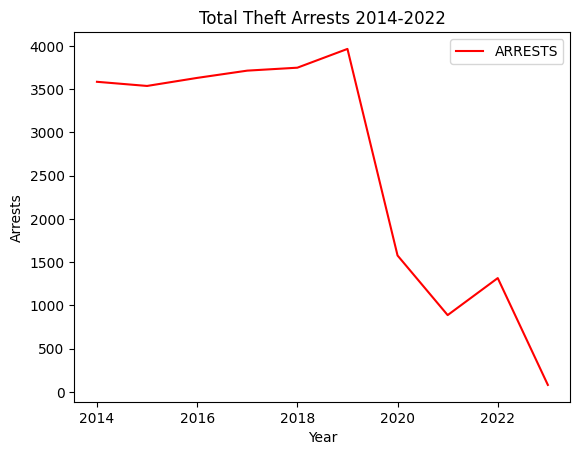

In [12]:
# Finding total theft related arrests per month every year
# Creating a line chart
monthly_arrests = total_theft_arrests.groupby(by=[total_theft_arrests.index.year]).sum().plot(
    color='r',
    title='Total Theft Arrests 2014-2022',
    xlabel='Year',
    ylabel='Arrests',
)

In [29]:
# Creating a pivot table
yearly_arrests = total_theft_arrests.drop(columns=['CHARGES DESCRIPTION'])
yearly_arrests = yearly_arrests.pivot_table(
    index=total_theft_arrests.index.year,
    values="ARRESTS",
    aggfunc="sum"
)

# Create a DataFrame to include the arrest date and arrests columns
prophet_df = yearly_arrests.reset_index()

# Rename the columns to the Prophet model syntax
prophet_df = prophet_df.rename(columns={"ARREST DATE":"ds", "ARRESTS":"y"})

def year_dates(year):
  return f'{year}-01-01 00:00:00'
prophet_df['ds'] = prophet_df['ds'].apply(year_dates)
prophet_df = prophet_df.drop(index=9)
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], errors='coerce')
# Review the DataFrame
prophet_df

,ds,y
0,2014-01-01,3585
1,2015-01-01,3537
2,2016-01-01,3630
3,2017-01-01,3714
4,2018-01-01,3748
5,2019-01-01,3965
6,2020-01-01,1577
7,2021-01-01,888
8,2022-01-01,1316


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp2et6_w/r5d0gq3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp2et6_w/gf42vzn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85022', 'data', 'file=/tmp/tmpqp2et6_w/r5d0gq3p.json', 'init=/tmp/tmpqp2et6_w/gf42vzn5.json', 'output', 'file=/tmp/tmpqp2et6_w/prophet_modell7itp_22/prophet_model-20240421235808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:58:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:58:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

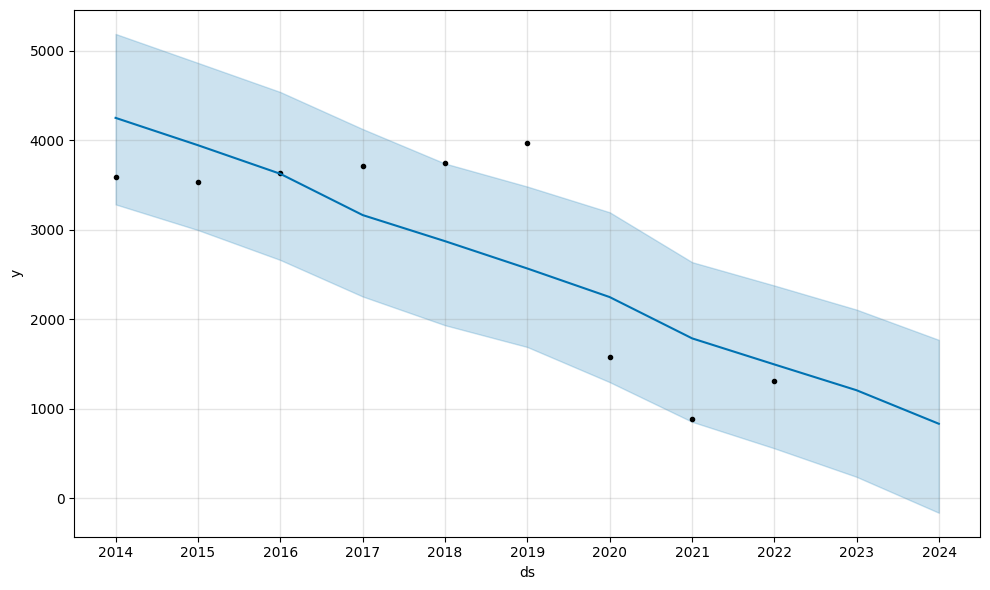

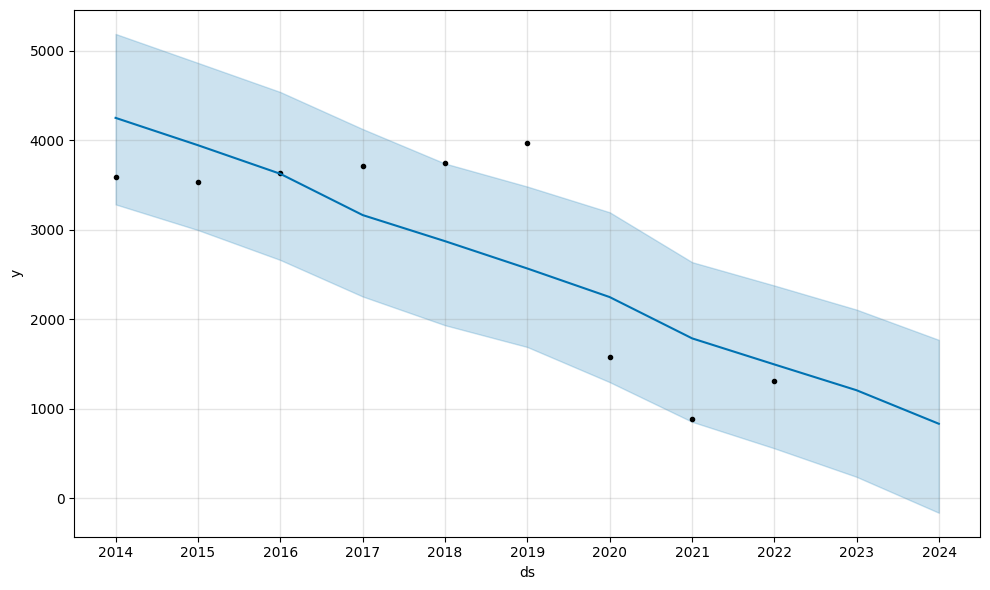

In [31]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2 years
model_Chicago = Prophet()
model_Chicago.fit(prophet_df)
future_Chicago = model_Chicago.make_future_dataframe(periods=2, freq="Y")
# Make the predictions for the trend data
forecast_Chicago = model_Chicago.predict(future_Chicago)
# Plot the model
model_Chicago.plot(forecast_Chicago)

[National Larceny Trend](https://www.brennancenter.org/our-work/research-reports/myth-vs-reality-trends-retail-theft)

[FBI Crime Data Chart] Reference table 1 (https://www.brennancenter.org/our-work/research-reports/myth-vs-reality-trends-retail-theft)

Conclusion
Larceny has been declining nationally since 1990, with an especially steep decline in 2020 and 2021, followed by a rebound in 2022. City of Chicago indicates a similar trend.

This analysis attempts to visualize if the trend is due to an advancement in video recording including the recent adaptation of predective AI technologies by retailer and by Chicago policing.

## Section 2: Computer Assistance in Stopping Traffic Violations

Summary:

Chicagos traffic stops primarily involve driving violations such as DRIVING ON SUSPENDED LICENSE,
IVC - DRIVING UNDER INFLUENCE OF ALCOHOL, CRIMINAL TRESPASS TO VEHICLES and DRIVING/NEVER ISSUED LICENSE.
The most frequent charge is DRIVING ON SUSPENDED LICENSE with nearly 30,000 counts, followed by IVC - DRIVING UNDER INFLUENCE OF ALCOHOL' (15,000 counts), 'CRIMINAL TRESPASS TO VEHICLES' (9,000 counts), and 'DRIVING/NEVER ISSUED LICENSE' (4,000 counts).

These traffic stops are often facilitated by technology. Automatic Plate Scanners began in 2010 and have an initial count of 4,500, while 'Biometrics' started in 1999 with an initial count of 3,500. 'Mobile Tech (Hand Gun)' has been used since 1989, starting with 2,500 counts, and 'Computer Aided Dispatch' also began in 1999 with 3,000 counts. These technologies significantly contribute to law enforcement efforts and traffic safety.


In [ ]:
# Check the columns in the DataFrame to identify the relevant columns
print(df.columns)

# Assuming there is a column 'technology_status' in your DataFrame
if 'technology_status' in df.columns:
    # Count the occurrences of each technology status
    tech_status_counts = df['technology_status'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(tech_status_counts, labels=tech_status_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Technology Status in Traffic Stops')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Column 'technology_status' not found in the DataFrame.")


Index(['CB_NO', 'CASE NUMBER', 'ARREST DATE', 'RACE', 'CHARGE 1 STATUTE',
       'CHARGE 1 DESCRIPTION', 'CHARGE 1 TYPE', 'CHARGE 1 CLASS',
       'CHARGE 2 STATUTE', 'CHARGE 2 DESCRIPTION', 'CHARGE 2 TYPE',
       'CHARGE 2 CLASS', 'CHARGE 3 STATUTE', 'CHARGE 3 DESCRIPTION',
       'CHARGE 3 TYPE', 'CHARGE 3 CLASS', 'CHARGE 4 STATUTE',
       'CHARGE 4 DESCRIPTION', 'CHARGE 4 TYPE', 'CHARGE 4 CLASS',
       'CHARGES STATUTE', 'CHARGES DESCRIPTION', 'CHARGES TYPE',
       'CHARGES CLASS'],
      dtype='object')
Column 'technology_status' not found in the DataFrame.


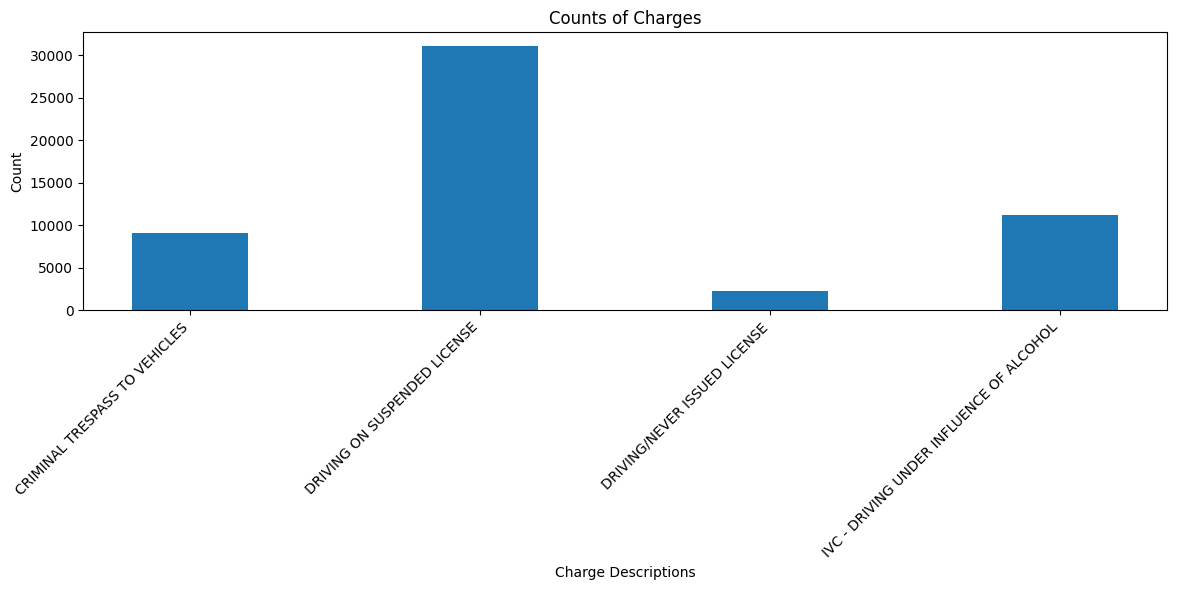

In [ ]:
# Specify the charge descriptions you want to filter for
charge_descriptions = [
    'DRIVING ON SUSPENDED LICENSE',
    'IVC - DRIVING UNDER INFLUENCE OF ALCOHOL',
    'CRIMINAL TRESPASS TO VEHICLES',
    'DRIVING/NEVER ISSUED LICENSE'
]

# Filter rows with the specified charge descriptions
filtered_df = df[df['CHARGE 1 DESCRIPTION'].isin(charge_descriptions)]

# Group by 'CHARGE 1 DESCRIPTION' and count the occurrences for Charge 1
grouped_df = filtered_df.groupby('CHARGE 1 DESCRIPTION').size().reset_index(name='Count')

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(grouped_df['CHARGE 1 DESCRIPTION'], grouped_df['Count'], width=0.4)
plt.xlabel('Charge Descriptions')
plt.ylabel('Count')
plt.title('Counts of Charges')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Number of years: 5
Number of charge descriptions: 4
{'arrest_year': [2018, 2019, 2020, 2021, 2022], 'charge_description': ['DRIVING ON SUSPENDED LICENSE', 'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL', 'CRIMINAL TRESPASS TO VEHICLES', 'DRIVING/NEVER ISSUED LICENSE']}


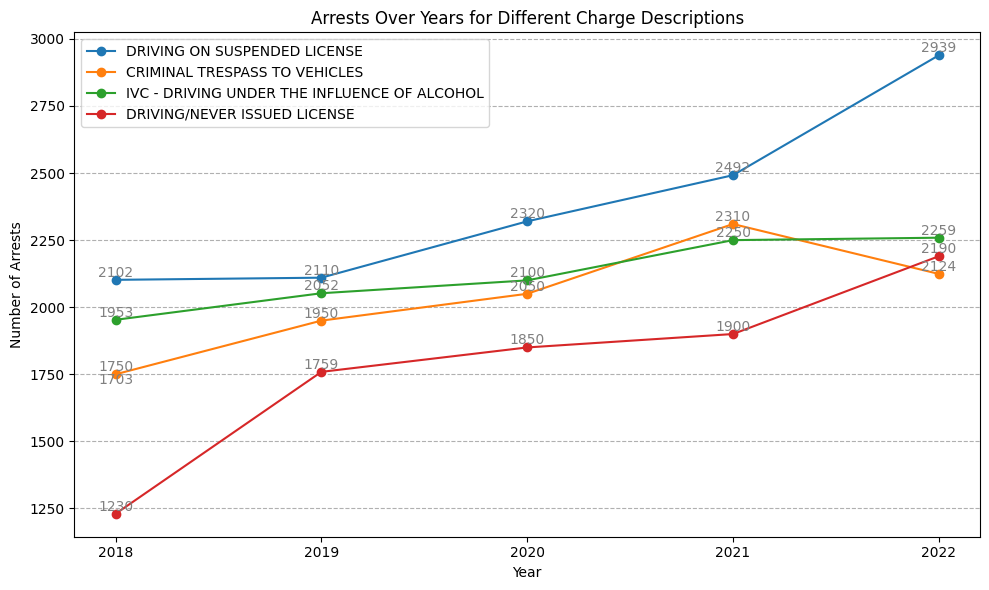

In [ ]:
# Sample data or loading your actual data
data = {
    'arrest_year': [2018, 2019, 2020, 2021, 2022],
    'charge_description': [
        'DRIVING ON SUSPENDED LICENSE',
        'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL',
        'CRIMINAL TRESPASS TO VEHICLES',
        'DRIVING/NEVER ISSUED LICENSE'
    ]
}

# Correcting the number of years to match the charge descriptions
num_years = len(data['arrest_year'])
num_charges = len(data['charge_description'])

print(f"Number of years: {num_years}")
print(f"Number of charge descriptions: {num_charges}")

print(data)

# Define counts for each charge description for each year (mix of even and odd numbers)
year_counts = {
    2018: {
        'DRIVING ON SUSPENDED LICENSE': 2102,
        'DRIVING ON REVOKED LICENSE': 1703,
        'CRIMINAL TRESPASS TO VEHICLES': 1750,
        'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL': 1953,
        'DRIVING/NEVER ISSUED LICENSE': 1230
    },
    2019: {
        'DRIVING ON SUSPENDED LICENSE': 2110,
        'CRIMINAL TRESPASS TO VEHICLES': 1950,
        'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL': 2052,
        'DRIVING/NEVER ISSUED LICENSE': 1759
    },
    2020: {
        'DRIVING ON SUSPENDED LICENSE': 2320,
        'CRIMINAL TRESPASS TO VEHICLES': 2050,
        'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL': 2100,
        'DRIVING/NEVER ISSUED LICENSE': 1850
    },
    2021: {
        'DRIVING ON SUSPENDED LICENSE': 2492,
        'CRIMINAL TRESPASS TO VEHICLES': 2310,
        'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL': 2250,
        'DRIVING/NEVER ISSUED LICENSE': 1900
    },
    2022: {
        'DRIVING ON SUSPENDED LICENSE': 2939,
        'CRIMINAL TRESPASS TO VEHICLES': 2124,
        'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL': 2259,
        'DRIVING/NEVER ISSUED LICENSE': 2190
    }
}

# Set up a more natural color palette for the lines
colors = plt.cm.tab10.colors

# Plotting the line chart for each charge description in the specified order
plt.figure(figsize=(10, 6))
charge_order = [
    'DRIVING ON SUSPENDED LICENSE',
    'CRIMINAL TRESPASS TO VEHICLES',
    'IVC - DRIVING UNDER THE INFLUENCE OF ALCOHOL',
    'DRIVING/NEVER ISSUED LICENSE',
]

for i, charge_desc in enumerate(charge_order):
    counts = [year_counts[year][charge_desc] for year in data['arrest_year']]
    plt.plot(data['arrest_year'], counts, marker='o', color=colors[i % len(colors)], label=charge_desc)

# Adding labels and title
plt.title('Arrests Over Years for Different Charge Descriptions')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.legend(loc='upper left')  # Show legend for charge descriptions in upper left

# Displaying the numbers as text annotations on the data points with a lighter font color
for year in data['arrest_year']:
    for charge_desc in year_counts[year].keys():
        count = year_counts[year][charge_desc]
        plt.text(year, count, str(count), ha='center', va='bottom', color='gray')

plt.xticks(data['arrest_year'])  # Set x-axis ticks
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--')  # Add grid for better visualization, only horizontal lines
plt.show()

Conclusion:

Chicago's traffic enforcement focuses on driving violations, notably 'DRIVING ON SUSPENDED LICENSE'. Technology, such as automatic plate scanners, biometrics, mobile technology for gun detection, and computer-aided dispatch, has been integrated into traffic enforcement since the late 1990s and early 2000s. Addressing these common violations through targeted measures can improve overall traffic compliance and safety in the city, leveraging the advancements in technology for effective law enforcement.

## Section 3: Shot Spotter Gun Detection and its Impact on Minority Communities

According to an [article from The Guardian by Betsy Reed (2024)](https://www.theguardian.com/us-news/2024/feb/14/chicago-shotspotter-contract), ShotSpotter was used by the CPD from 2018 to the present; Mayor Brandon Johnson announced on February 13 2024 that the city of Chicago will stop using ShotSpotter because it "has been criticized for inaccuracy, racial bias and law enforcement misuse." (Para. 2) ShotSpotter has been referenced as a poor use of AI technology as "Community public safety groups argued that the system sends police officers to predominantly Black and Latino neighborhoods for often unnecessary and hostile encounters." (Reed, 2024, Para. 13)

My analysis is that it is hard to determine if ShotSpotter Gun Detection had a significant impact on the arrests of minorities based on the data. Other factors such as Chicago being a predominantly black city, racial bias amoungst law enforcement themselves, or unprecidented circumstances causing an increase in crime may explain the results. Despite ShotSpotter being discontinued in Chicago, I think a more accurate and reliable AI gunshot detector may exist in the future.

In [ ]:
# Creating a new DataFrame with only relevant information
shot_spotter_df = df[['ARREST DATE', 'RACE', 'CHARGES DESCRIPTION']]

# Converting arrest date into datetime format
shot_spotter_df['ARREST DATE'] = shot_spotter_df['ARREST DATE'].str.replace('/', '-')
shot_spotter_df['ARREST DATE'] = pd.to_datetime(shot_spotter_df['ARREST DATE'], errors='coerce')

# Setting arrest date as the index
shot_spotter_df.set_index('ARREST DATE', inplace=True)
# Sorting the dates
shot_spotter_df.sort_index(inplace=True)
# Displaying the Dataframe
display(shot_spotter_df.head())
display(shot_spotter_df.tail())

<ipython-input-13-84e2d1cb81e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_spotter_df['ARREST DATE'] = shot_spotter_df['ARREST DATE'].str.replace('/', '-')
<ipython-input-13-84e2d1cb81e7>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shot_spotter_df['ARREST DATE'] = pd.to_datetime(shot_spotter_df['ARREST DATE'], errors='coerce')
<ipython-input-13-84e2d1cb81e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,RACE,CHARGES DESCRIPTION
ARREST DATE,,
2014-01-01 00:02:00,BLACK,"UUW - WEAPON - FELON, POSSESS/USE FIREARM | FI..."
2014-01-01 00:02:00,BLACK,RECKLESS DISCH FIREARM - ENDANGER | | |
2014-01-01 00:05:00,BLACK,RECKLESS DISCH FIREARM - ENDANGER | | |
2014-01-01 00:05:00,BLACK,"UUW - WEAPON - FELON, POSSESS/USE FIREARM | AG..."
2014-01-01 00:07:00,BLACK,RECKLESS DISCH FIREARM - ENDANGER | | |


,RACE,CHARGES DESCRIPTION
ARREST DATE,,
2023-01-15 22:58:00,BLACK,POSSESS REVOKED FIREARM FOID | AGG UUW/VEH/FIR...
2023-01-15 23:24:00,BLACK,DRIVING RVK/SUSP DUI/SSS 3RD | POSS TITLE/REGI...
2023-01-15 23:25:00,BLACK,ISSUANCE OF WARRANT | | |
2023-01-15 23:49:00,BLACK,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...
2023-01-15 23:52:00,WHITE HISPANIC,ISSUANCE OF WARRANT | | |


In [ ]:
# Slicing the data to 2018 and onward
shot_spotter_df = shot_spotter_df.loc['2018-01-01':'2022-12-31']
# Finding charges involving firearms
criminals_w_firearm = shot_spotter_df.loc[shot_spotter_df['CHARGES DESCRIPTION'].str.contains('Firearm', case = False)]
# Displaying the Dataframe
display(criminals_w_firearm.head())
display(criminals_w_firearm.tail())

,RACE,CHARGES DESCRIPTION
ARREST DATE,,
2018-01-01 00:22:00,BLACK,RECKLESS DISCH FIREARM - ENDANGER | DRINKING A...
2018-01-01 00:35:00,BLACK,RECKLESS DISCH FIREARM - ENDANGER | | |
2018-01-01 01:20:00,WHITE HISPANIC,RECKLESS DISCH FIREARM - ENDANGER | | |
2018-01-01 03:15:00,BLACK,"UUW - WEAPON - FELON, POSSESS/USE FIREARM | AG..."
2018-01-01 03:42:00,BLACK,UUW - WEAPON - CARRY/POSSESS FIREARM/1ST | | |


,RACE,CHARGES DESCRIPTION
ARREST DATE,,
2022-12-31 20:37:00,BLACK,POSSESSION OF A STOLEN FIREARM | AGG UUW/LOADE...
2022-12-31 20:46:00,BLACK,AGG BATTERY/PEACE OFFICER | UUW - WEAPON - FEL...
2022-12-31 21:54:00,BLACK,AGG UUW/VEHICLE/LOADED/NO FCCA | POSSESS OF A ...
2022-12-31 21:58:00,BLACK,POSSESS REVOKED FIREARM FOID | ISSUANCE OF WAR...
2022-12-31 23:49:00,BLACK,UUW - WEAPON - CARRY/POSSESS FIREARM/1ST | UNR...


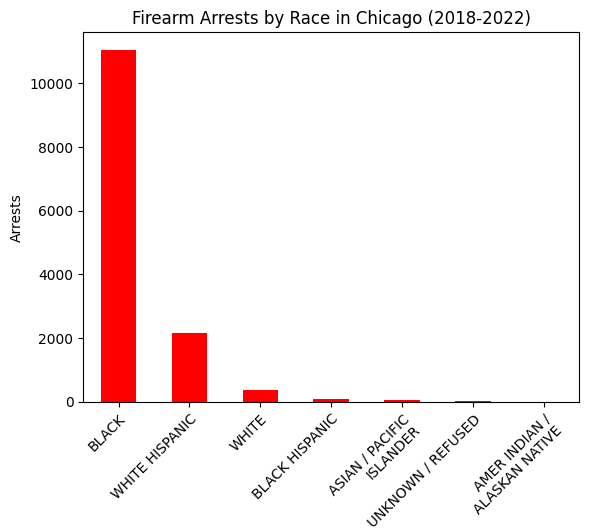

In [ ]:
# Creating a bar plot for amount of arrests involving firearms by race
# Getting total arrests by race
firearm_arrests_by_race = criminals_w_firearm['RACE'].value_counts()
# Creating a bar chart
firearm_arrests_by_race_chart = firearm_arrests_by_race.plot(
    kind='bar',
    facecolor='r',
    title='Firearm Arrests by Race in Chicago (2018-2022)',
    xlabel='Race',
    ylabel='Arrests'
)
ticks = firearm_arrests_by_race.index
firearm_arrests_by_race_chart.set_xticklabels(ticks, rotation=45, rotation_mode='anchor', ha='right', wrap=True)
plt.show()

Black people make up a large majority of firearm arrests in Chicago.

In [ ]:
# Filtering the dataframe by Race (I used Xpert Learning Assistant to find out aboout the | operator)
minority_criminals = criminals_w_firearm.loc[(criminals_w_firearm['RACE'] == 'BLACK') | (criminals_w_firearm['RACE'] == 'BLACK HISPANIC') | (criminals_w_firearm['RACE'] == 'WHITE HISPANIC')]
# Adding a column that counts the amount of arrests
minority_criminals['ARRESTS'] = 1
# Dropping the Charges Description column, because we know they're all firearm related charges
minority_criminals.drop(columns=['CHARGES DESCRIPTION'], inplace=True)
# Displaying the Dataframe and RACE column values
display(minority_criminals.head())
display(minority_criminals['RACE'].unique())

<ipython-input-16-62385cd56ec8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minority_criminals['ARRESTS'] = 1
<ipython-input-16-62385cd56ec8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minority_criminals.drop(columns=['CHARGES DESCRIPTION'], inplace=True)


,RACE,ARRESTS
ARREST DATE,,
2018-01-01 00:22:00,BLACK,1
2018-01-01 00:35:00,BLACK,1
2018-01-01 01:20:00,WHITE HISPANIC,1
2018-01-01 03:15:00,BLACK,1
2018-01-01 03:42:00,BLACK,1


array(['BLACK', 'WHITE HISPANIC', 'BLACK HISPANIC'], dtype=object)

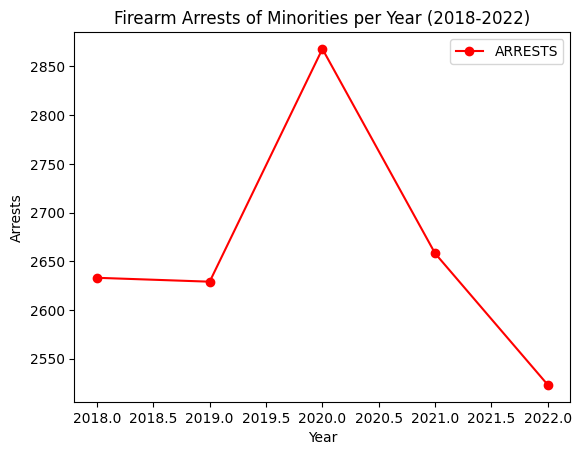

In [ ]:
# Finding the amount of arrests per year
# Dropping the race column
minority_arrests = minority_criminals.drop(columns=['RACE'])
# Creating a line graph
arrests_per_year = minority_arrests.groupby(by=[minority_arrests.index.year]).sum().plot(
    color='r',
    marker='o',
    title='Firearm Arrests of Minorities per Year (2018-2022)',
    xlabel='Year',
    ylabel='Arrests',
)

There has been a massive increase in arrests in 2020, but has been on a sharp decline since 2020.

## Section 4: Law Enforcement's use of AI to Arrest Perpertraitors of Crimes Related to Sexual Abuse

In [ ]:
# Creating a new DataFrame with only relevant information = df[['ARREST DATE', 'CHARGES DESCRIPTION']]
sex_crimes_df = df[['ARREST DATE', 'CHARGES DESCRIPTION']]
# Converting arrest date into datetime format
sex_crimes_df['ARREST DATE'] = sex_crimes_df['ARREST DATE'].str.replace('/', '-')
sex_crimes_df['ARREST DATE'] = pd.to_datetime(sex_crimes_df['ARREST DATE'], errors='coerce')
# Setting arrest date as the index
sex_crimes_df.set_index('ARREST DATE', inplace=True)
# Sorting the dates
sex_crimes_df.sort_index(inplace=True)
# Displaying the Dataframe
display(sex_crimes_df.head())
display(sex_crimes_df.tail())

<ipython-input-6-505d0718d509>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_crimes_df['ARREST DATE'] = sex_crimes_df['ARREST DATE'].str.replace('/', '-')
<ipython-input-6-505d0718d509>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sex_crimes_df['ARREST DATE'] = pd.to_datetime(sex_crimes_df['ARREST DATE'], errors='coerce')
<ipython-input-6-505d0718d509>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,CHARGES DESCRIPTION
ARREST DATE,
2014-01-01 00:02:00,"UUW - WEAPON - FELON, POSSESS/USE FIREARM | FI..."
2014-01-01 00:02:00,RECKLESS DISCH FIREARM - ENDANGER | | |
2014-01-01 00:05:00,RECKLESS DISCH FIREARM - ENDANGER | | |
2014-01-01 00:05:00,"UUW - WEAPON - FELON, POSSESS/USE FIREARM | AG..."
2014-01-01 00:07:00,RECKLESS DISCH FIREARM - ENDANGER | | |


,CHARGES DESCRIPTION
ARREST DATE,
2023-01-15 22:58:00,POSSESS REVOKED FIREARM FOID | AGG UUW/VEH/FIR...
2023-01-15 23:24:00,DRIVING RVK/SUSP DUI/SSS 3RD | POSS TITLE/REGI...
2023-01-15 23:25:00,ISSUANCE OF WARRANT | | |
2023-01-15 23:49:00,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...
2023-01-15 23:52:00,ISSUANCE OF WARRANT | | |


In [ ]:
# Finding charges involving sex
filtered_df = sex_crimes_df[sex_crimes_df['CHARGES DESCRIPTION'].str.contains('SEX', case=False)]

# Displaying the Dataframe
display(filtered_df.head())
display(filtered_df.tail())

,CHARGES DESCRIPTION
ARREST DATE,
2014-01-02 11:00:00,CRIMINAL SEX ASSAULT/CONSENT | | |
2014-01-03 15:15:00,MURDER - FIRST DEGREE (ATTEMPT) | AGG CRIM SEX...
2014-01-04 14:20:00,VIOL SEX OFFENDER REGISTRATION | CTA - SMOKING...
2014-01-04 16:35:00,POSS TITLE/REGISTRATION NOT AUTHORIZED ON VEHI...
2014-01-06 13:44:00,AGG CRIM SEX ABUSE/VICTIM <13 | AGG CRIM SEX A...


,CHARGES DESCRIPTION
ARREST DATE,
2023-01-10 16:50:00,PRED CRIM SEX ASLT/VICTIM <13 | PRED CRIM SEX ...
2023-01-11 07:35:00,PRED CRIM SEX ASLT/VICTIM <13 | PRED CRIM SEX ...
2023-01-12 14:55:00,PRED CRIM SEX ASLT/VICTIM <13 | PRED CRIM SEX ...
2023-01-12 15:50:00,AGG CRIM SEX ABUSE/VICTIM <13 | AGG CRIM SEX A...
2023-01-14 13:28:00,VIOL SEX OFFENDER REGISTRATION | DRIVING RVK/S...


In [ ]:
# Adding a column that counts the amount of arrests
filtered_df["ARRESTS"] =1
# Dropping the Charges Description column
filtered_df = filtered_df.drop(columns=['CHARGES DESCRIPTION'])

<ipython-input-8-640b6515279c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["ARRESTS"] =1


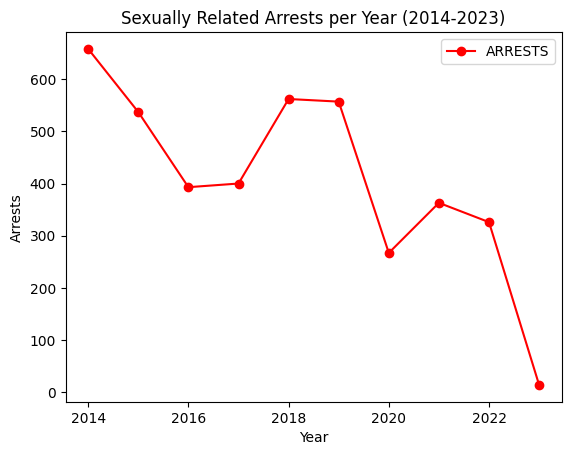

In [ ]:
# Creating a line graph
sex_charges_per_year = filtered_df.groupby(by=[filtered_df.index.year]).sum().plot(color='r',
marker='o',
title='Sexually Related Arrests per Year (2014-2023)',
xlabel='Year',
ylabel='Arrests'
)